# IOT Smart Food monitoring using TI Sensor Tag

## Description of the Setup

- Raspberry Pi – BLE is supported in the version 3 of the Raspberry Pi which is used to receive
sensor data coming from Ti sensor tag.
-  Ti sensor CC2650 : Consist of 9 low-power MEMS sensors including support for light, digital
microphone, magnetic sensor, humidity, pressure, accelerometer, gyroscope, magnetometer
and temperature.
-  Debugger : A Debugger which is used to connect Ti sensor tag with the PC and provide
continuous power supply to the tag.
-  Putty tool : It is used to remotely access and configure the Raspberry Pi.

## Setting up the Software Environment

- Install Bluez on the Raspberry Pi.
- Before installing Bluez, the Raspberry Pi environment needs to be updated to have the following set of libraries :



sudo apt-get install libglib2.0-0 libglib2.0-dev

sudo apt-get install libdbus-1-dev

- sudo apt-get install libudev-dev
- sudo apt-get install libical-dev
- sudo apt-get install libreadline-dev
- sudo apt-get install libusb-1.0-0-dev

configure the Bluez by executing following command :
    
sudo ./configure --prefix=/usr--mandir=/usr/share/man--sysconfdir=/etc --localstatedir=/var --with-systemdsystemunitdir --with-systemduserunitdir --enable-library

Post successful configuration, now perform make to install the Bluez

While in you are still in the main directory, copy the gatttool binary that got created in the
earlier step, to ‘/usr/local/bin‘ folder

sudo cp attrib/gatttool /usr/local/bin

Now we have to scan to discover the TI Sensor Tag by running the following commands.

sudo hciconfig hci0 up


sudo hcitool lescan

We should see a list of active unpaired bluetooth devices around us including the TI SensorTag in
the following format:

98:07:2D:27:A7:81 CC2650 Sensor Tag

Insert the bluetooth address for the Sensor Tag in the “Humidity.py” script for the variable MAC.

MAC = "98:07:2D:27:A7:81"

Run the Python script “TI_Sensor_Tag.py” in Raspberry Pi to pair with and get the temperature &
Humidity readings from the Ti Sensor Tag. Below is the screenshot of the output result
containing temperature and humidity readings.

## Problems Encountered

The following problems has been encountered :
1. The readings from the temperature sensor gives the value -> ’04 00 ad 27 01 11 31′ as output
from ‘char-read-hnd 0x21’ command, which is a wrong value as temperature values should
change when it is placed in different ambience.

2. New temperature handles are: read – 0x24, write 0x27. Unfortunately, it provide value as ‘00 00
00 00’. The ‘00 00 00 00’ output is due to the fact that the latest Ti sensor tag does not contain IR
temperature sensor.

3. The new sensor tag contains no the IR temperature sensor, TMP007. Sensor Tags with PCB
revision 1.5.1 do not have this sensor mounted. However, the humidity and pressure sensors can
be used to provide temperature readings.

4. The correct command to pair the Raspberry Pi with TI Sensor Tag is
Command
gatttool -b C4:BE:78:A6:09 –I

5. Upon connecting 3V battery, the Ti sensor tag becomes undetectable and red light glows. The
red light glowing in Ti sensor tag indicates need for the firmware update.

6. No light glows in Ti sensor tag because the 3V battery has been drained out. It should be noted
that Ti sensor tag starts broadcasting its MAC address, when the green led blinks.

## Results

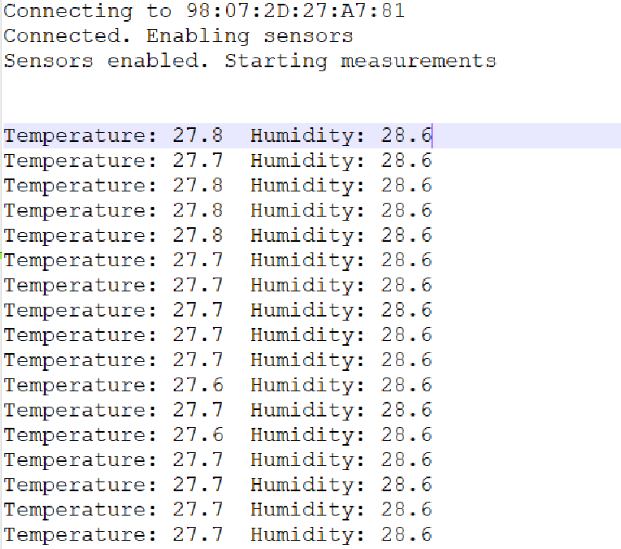

                              Fig: Screenshot of the output